# Week 4 

## Name         : Ayachit Madhukar  
## Course       : DSC530 
## Instructor  : Mr. Shankar Parajulee 
## Date           : 05 Jan 2020

**Exercise:** How much did you weigh at birth? If you don’t know, call your mother or someone else who knows. Using the NSFG data (all live births), compute the distribution of birth weights and use it to find your percentile rank. If you were a first baby, find your percentile rank in the distribution for first babies. Otherwise use the distribution for others. If you are in the 90th percentile or higher, call your mother back and apologize.

In [20]:
# setting uop working directory
import os
os.getcwd() 
import sys
sys.path.append('../ThinkStats2-master/code')

In [21]:
# Import modules 
import first
import thinkstats2
import thinkplot
import numpy as np


In [22]:

live, firsts, others = first.MakeFrames()

first_wgt = firsts.totalwgt_lb
first_wgt_dropna = first_wgt.dropna()
print('Firsts', len(first_wgt), len(first_wgt_dropna))
 
other_wgt = others.totalwgt_lb
other_wgt_dropna = other_wgt.dropna()
print('Others', len(other_wgt), len(other_wgt_dropna))

first_pmf = thinkstats2.Pmf(first_wgt_dropna, label='first')
other_pmf = thinkstats2.Pmf(other_wgt_dropna, label='other')

Firsts 4413 4363
Others 4735 4675


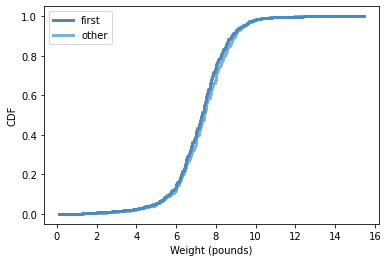

In [23]:
first_cdf = thinkstats2.Cdf(firsts.totalwgt_lb, label='first')
other_cdf = thinkstats2.Cdf(others.totalwgt_lb, label='other')

thinkplot.PrePlot(2)
thinkplot.Cdfs([first_cdf, other_cdf])
thinkplot.Config(xlabel='Weight (pounds)', ylabel='CDF')

In [24]:
#  I wasn't first baby , looing my rank in other cdf
myWeight=7
myRank=other_cdf.PercentileRank(myWeight)
print ('My percentile rank was :  ' + str(myRank) )


My percentile rank was :  38.67379679144385


**Exercise:** The numbers generated by `numpy.random.random` are supposed to be uniform between 0 and 1; that is, every value in the range should have the same probability.

Generate 1000 numbers from `numpy.random.random` and plot their PMF.  What goes wrong?

Now plot the CDF. Is the distribution uniform?

In [26]:
# Solution

t = np.random.random(1000)

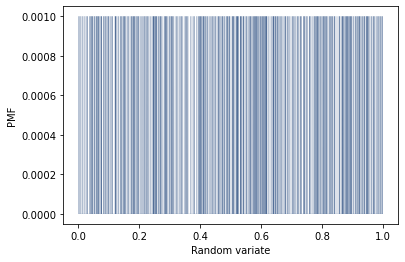

In [27]:
# Calculating PMF and Plotting graph

pmf = thinkstats2.Pmf(t)
thinkplot.Pmf(pmf, linewidth=0.1)
thinkplot.Config(xlabel='Random variate', ylabel='PMF')

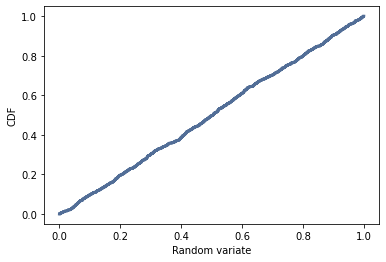

In [28]:
# Calculating CDF and plotting Graph

cdf = thinkstats2.Cdf(t)
thinkplot.Cdf(cdf)
thinkplot.Config(xlabel='Random variate', ylabel='CDF')